In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import proplot as ppt
import tueplots.bundles
import tueplots.axes
from tueplots.constants import markers
from cycler import cycler

from common import *

In [2]:
neurips_bundle = tueplots.bundles.neurips2022()
del neurips_bundle["figure.constrained_layout.use"]
pp.rcParams.update(neurips_bundle)
pp.rcParams.update(tueplots.axes.tick_direction())
pp.rcParams["text.latex.preamble"] += r"\usepackage{nicefrac}"
pp.rcParams["pgf.preamble"] = pp.rcParams["text.latex.preamble"]

%matplotlib inline

In [3]:
df = pd.read_pickle("pid.pickle")
print(f"Finished {df.finished.astype(bool).sum()} / {len(df)}")

df = df[df["finished"].astype(bool)]
df["mu"] = df["mu"].astype(int)

I = df[df.source == "I"]
df = df[df.source != "I"]
df = df[df["source"] == "diffrax"]
df = df.merge(I[["mu", "steps"]], on="mu", how="inner", suffixes=("", "_i"))
df["improvement"] = df["steps"] / df["steps_i"]

Finished 800 / 1000


In [4]:
def format_ylabel(y, _):
    y = int(y)
    if y == 0:
        return r"0\%"
    else:
        return rf"{y:+d}\%"

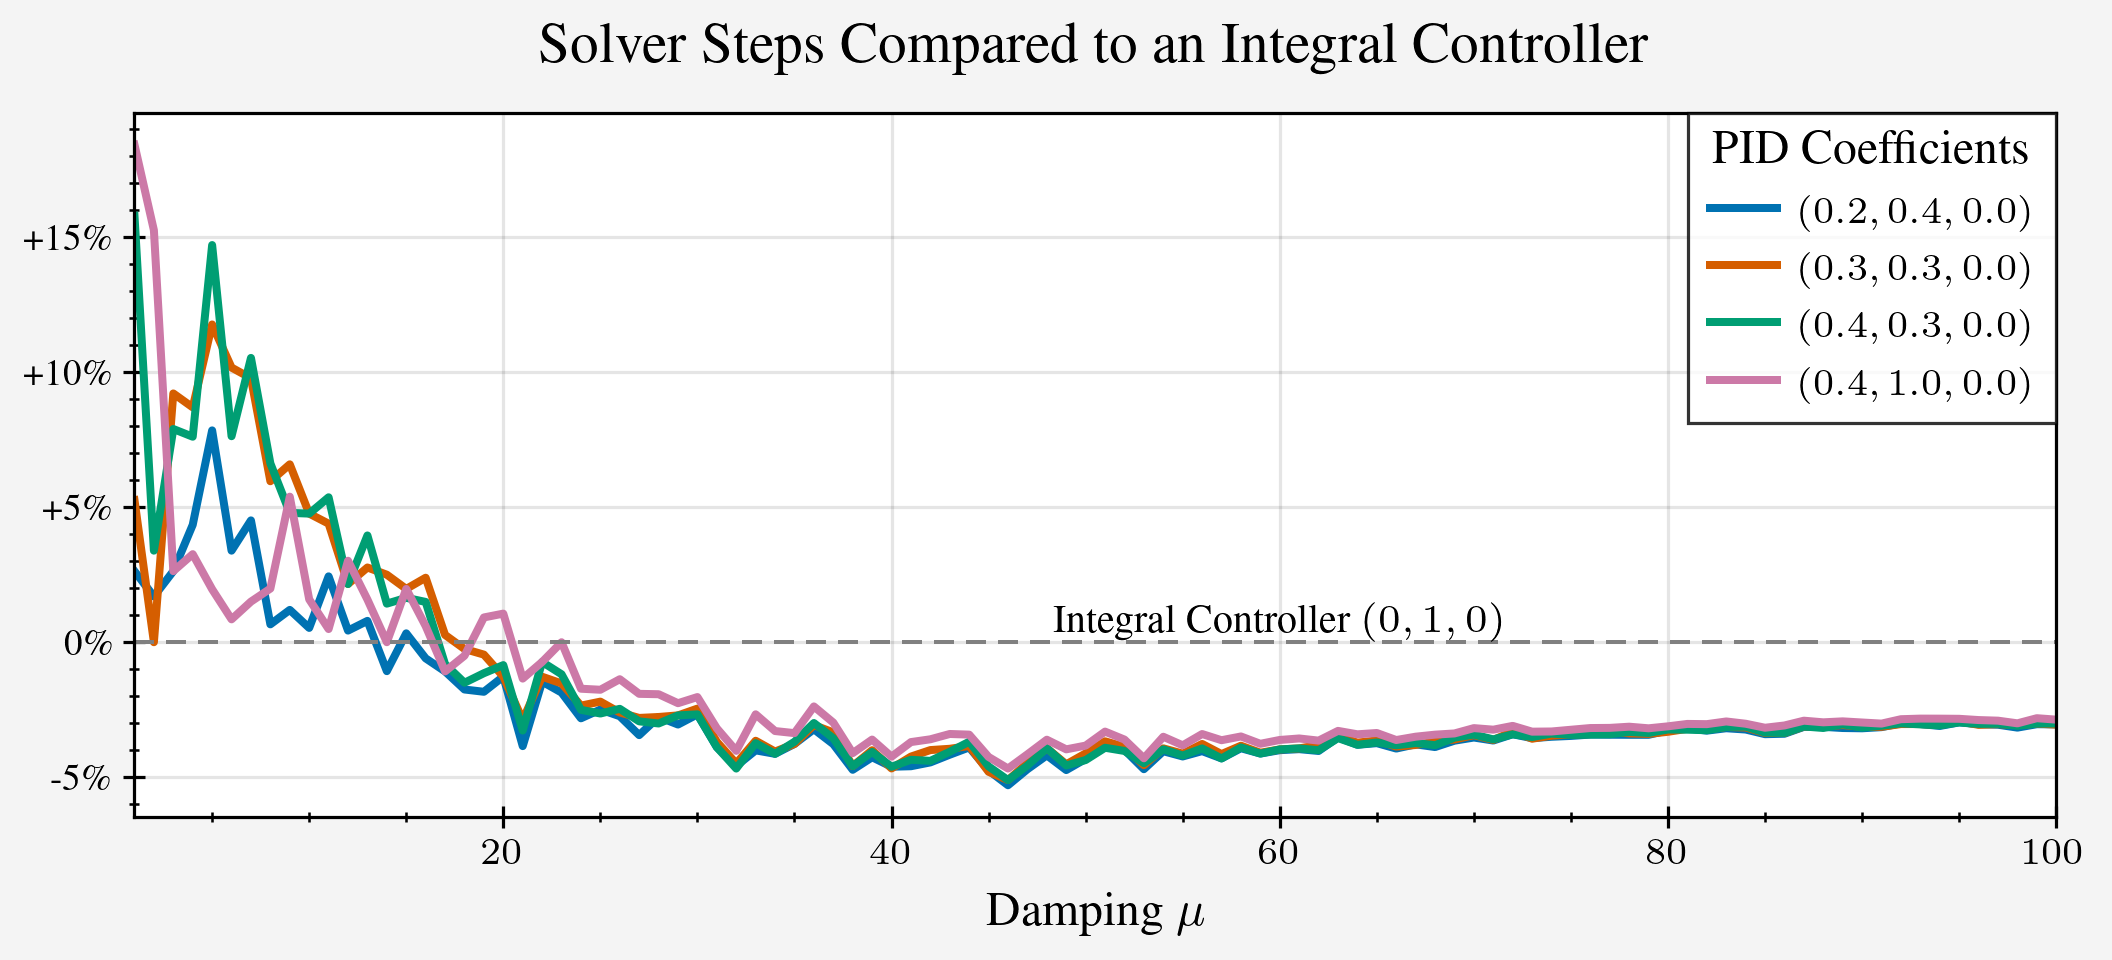

In [5]:
fig = ppt.figure(figtitle="Solver Steps Compared to an Integral Controller", dpi=192, share=False, suptitle_kw={"size": "large"}, suptitlepad=7.0, figsize=(5.5, 2.5))
ax = fig.add_subplot(111)
ax.format(xlabel=r"Damping $\mu$", ylabel="", yformatter=format_ylabel)
for pid, pid_df in tuple(df.groupby(["P", "I", "D"])):
    p, i, d = pid
    mu = np.array(pid_df.mu)
    improvement = np.array(pid_df.improvement)
    ax.plot(mu, (improvement - 1) * 100, label=f"$({round(p, 2)}, {round(i, 2)}, {round(d, 2)})$")
ax.plot(mu, np.zeros_like(mu), ls=(0, (5.0, 3.0)), lw=0.75, c="0.5")
ax.text(60, 0.005, "Integral Controller $(0, 1, 0)$", va="bottom", ha="center", fontsize="small")
ax.legend(loc="upper right", frameon=True, ncol=1, title="PID Coefficients")

In [6]:
fig.savefig(figroot / "pid.pdf")